In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## ***Import Data From Kaggle***

In [12]:
!pip install -q kaggle

In [13]:
!mkdir -p ~/.kaggle

In [14]:
!cp kaggle.json ~/.kaggle/

In [15]:
!chmod 600 /root/.kaggle/kaggle.json

In [16]:
!kaggle datasets download -d 'bhavikbb/password-strength-classifier-dataset'

Dataset URL: https://www.kaggle.com/datasets/bhavikbb/password-strength-classifier-dataset
License(s): copyright-authors
  0% 0.00/5.01M [00:00<?, ?B/s]
100% 5.01M/5.01M [00:00<00:00, 727MB/s]


In [17]:
import zipfile
zip_ref = zipfile.ZipFile('/content/password-strength-classifier-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# ***Cleaning Data***

In [18]:
data = pd.read_csv("data.csv", on_bad_lines='skip')
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [19]:
# CEK DATAAAA
# cleaned_file_path = 'cleaned_data.csv'
# data.to_csv(cleaned_file_path, index=False)

# cleaned_file_path

In [20]:
data_check = data.isnull().sum()
data_check

,0
password,1
strength,0


In [21]:
# Display rows that have missing values
missing_values_rows = data[data.isnull().any(axis=1)]
missing_values_rows

,password,strength
367579,NaN,0


In [22]:
data.dropna(subset=['password'], inplace=True)


In [23]:
data_missing_check = data.isnull().sum()
data_missing_check

,0
password,0
strength,0


In [24]:
data.dtypes

,0
password,object
strength,int64


In [25]:
# The previous checks confirmed that there are no rows with more than 2 columns.
# This code is no longer needed.
column_counts = data.apply(lambda row: len(row), axis=1)
rows_with_more_than_2_columns = data[column_counts > 2]

In [26]:
# This code is no longer needed as the previous checks confirmed there are no rows with more than 2 columns.
rows_with_more_than_2_columns

,password,strength


In [27]:
strength_counts = data['strength'].value_counts(normalize=True) * 100
print(strength_counts)

strength
1    74.189377
0    13.395426
2    12.415197
Name: proportion, dtype: float64


In [28]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1. Boxplot sebelum undersampling
# plt.figure(figsize=(8, 6))
# sns.boxplot(x='strength', y='password', data=data)
# plt.title("Boxplot Sebelum Undersampling")
# plt.show()

# # 2. Undersampling pada kategori dominan (strength == 1)
from sklearn.utils import resample

# Pisahkan data berdasarkan kategori
data_0 = data[data['strength'] == 0]
data_1 = data[data['strength'] == 1]
data_2 = data[data['strength'] == 2]

# Undersample data kategori 1 agar jumlahnya sama dengan kategori 0 dan 2
data_1_undersampled = resample(data_1,
                                replace=False,    # Tanpa penggantian (sampling acak)
                                n_samples=len(data_0),  # Menyamaratakan jumlah dengan kategori 0
                                random_state=42)

# Gabungkan kembali data yang sudah di-undersample
data_undersampled = pd.concat([data_0, data_1_undersampled, data_2])

# # 3. Boxplot setelah undersampling
# plt.figure(figsize=(8, 6))
# sns.boxplot(x='strength', y='password', data=data_undersampled)
# plt.title("Boxplot Setelah Undersampling")
# plt.show()

In [29]:
strength_counts2 = data_undersampled['strength'].value_counts(normalize=True) * 100
print(strength_counts2)

strength
0    34.166733
1    34.166733
2    31.666533
Name: proportion, dtype: float64


In [30]:
data_undersampled["strength"] = data_undersampled["strength"].map({0: "Weak", 1: "Medium", 2: "Strong"})
data_undersampled.head()

,password,strength
21,intel1,Weak
35,lsdlsd1,Weak
44,olmaz.,Weak
50,ok>bdk,Weak
58,d04m11,Weak


# EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Password class distribution of the dataset

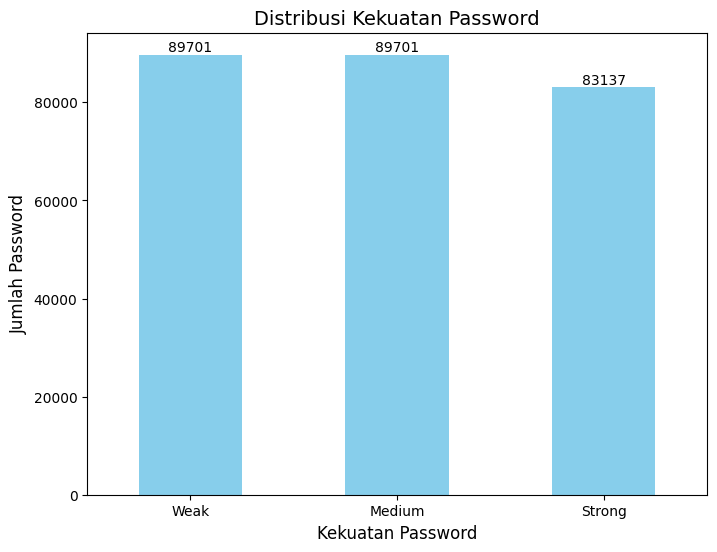

In [ ]:
# Membuat kelas Password
class Password:
    def __init__(self, data):
        self.data = data

    def strength_distribution(self):
        # Menghitung distribusi kekuatan password
        distribution = self.data['strength'].value_counts()
        return distribution

# Menginstansiasi objek Password dengan data_undersampled
password_data = Password(data_undersampled)

# Mendapatkan distribusi kekuatan password
distribution = password_data.strength_distribution()

# Menampilkan grafik distribusi kekuatan password
plt.figure(figsize=(8,6))
ax = distribution.plot(kind='bar', color='skyblue')

# Menambahkan label dan judul
plt.title('Distribusi Kekuatan Password', fontsize=14)
plt.xlabel('Kekuatan Password', fontsize=12)
plt.ylabel('Jumlah Password', fontsize=12)
plt.xticks(rotation=0)

# Menambahkan nilai di atas setiap bar
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Menampilkan grafik
plt.show()

## Distribution of the main features of the password

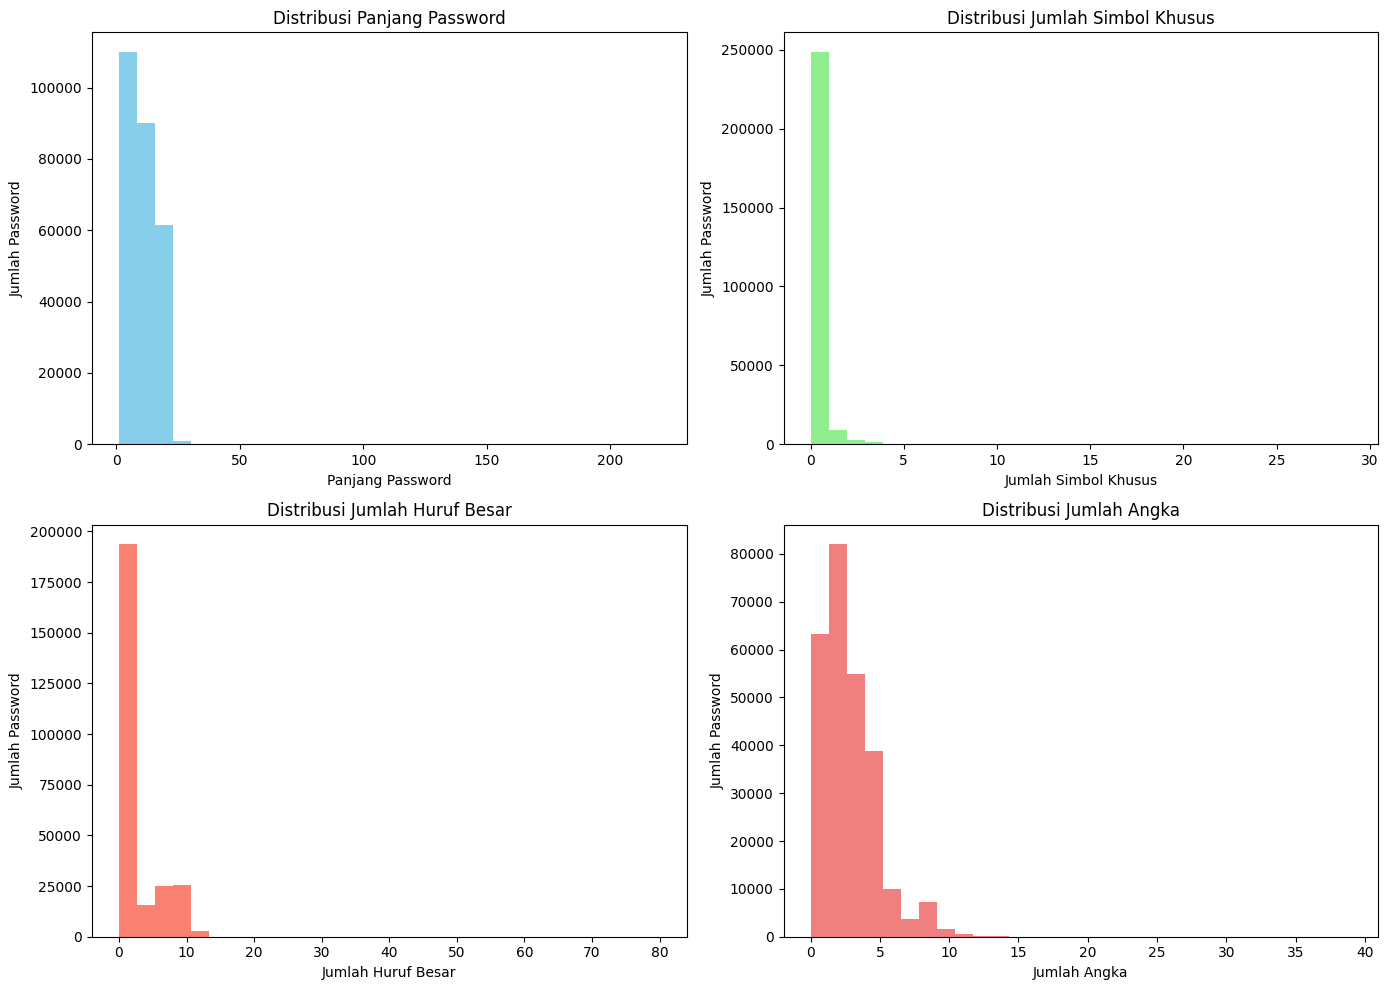

In [ ]:
# Fungsi untuk menghitung panjang password
def password_length(password):
    return len(password)

# Fungsi untuk menghitung jumlah simbol khusus
def special_symbols_count(password):
    return len(re.findall(r'[^A-Za-z0-9]', password))

# Fungsi untuk menghitung jumlah huruf besar
def uppercase_count(password):
    return len(re.findall(r'[A-Z]', password))

# Fungsi untuk menghitung jumlah angka
def digits_count(password):
    return len(re.findall(r'[0-9]', password))

# Menambahkan fitur ke dataset
data_undersampled['password_length'] = data_undersampled['password'].apply(password_length)
data_undersampled['special_symbols'] = data_undersampled['password'].apply(special_symbols_count)
data_undersampled['uppercase_count'] = data_undersampled['password'].apply(uppercase_count)
data_undersampled['digits_count'] = data_undersampled['password'].apply(digits_count)

# Plotting distribusi fitur utama password
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot (a) Panjang Password
axes[0, 0].hist(data_undersampled['password_length'], bins=30, color='skyblue')
axes[0, 0].set_title('Distribusi Panjang Password')
axes[0, 0].set_xlabel('Panjang Password')
axes[0, 0].set_ylabel('Jumlah Password')

# Plot (b) Jumlah Simbol Khusus
axes[0, 1].hist(data_undersampled['special_symbols'], bins=30, color='lightgreen')
axes[0, 1].set_title('Distribusi Jumlah Simbol Khusus')
axes[0, 1].set_xlabel('Jumlah Simbol Khusus')
axes[0, 1].set_ylabel('Jumlah Password')

# Plot (c) Jumlah Huruf Besar
axes[1, 0].hist(data_undersampled['uppercase_count'], bins=30, color='salmon')
axes[1, 0].set_title('Distribusi Jumlah Huruf Besar')
axes[1, 0].set_xlabel('Jumlah Huruf Besar')
axes[1, 0].set_ylabel('Jumlah Password')

# Plot (d) Jumlah Angka
axes[1, 1].hist(data_undersampled['digits_count'], bins=30, color='lightcoral')
axes[1, 1].set_title('Distribusi Jumlah Angka')
axes[1, 1].set_xlabel('Jumlah Angka')
axes[1, 1].set_ylabel('Jumlah Password')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

# ***Meachine Learning***

## Random Forest


In [ ]:
def word(password):
    character=[]
    for i in password:
        character.append(i)
    return character

x = np.array(data_undersampled["password"])
y = np.array(data_undersampled["strength"])

tdif = TfidfVectorizer(tokenizer=word)
x = tdif.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.05,
                                                random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9507122724156319


In [ ]:
import getpass
user = getpass.getpass("Enter Password: ")
data = tdif.transform([user]).toarray()
output = model.predict(data)
print(output)


Enter Password: ··········
['Strong']


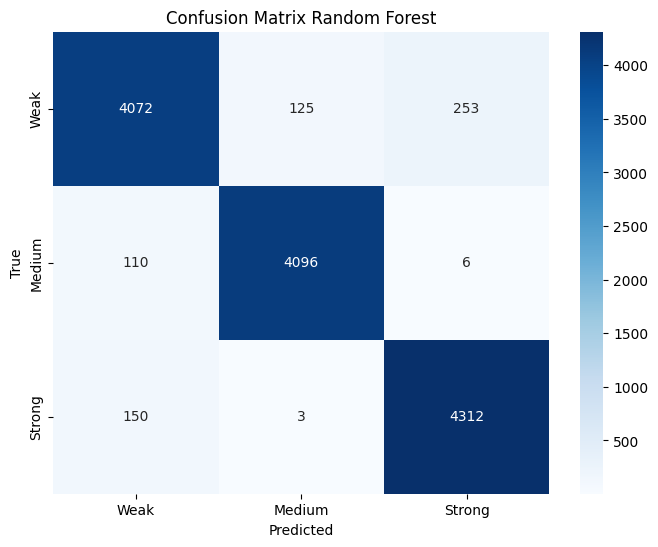

              precision    recall  f1-score   support

      Medium       0.94      0.92      0.93      4450
      Strong       0.97      0.97      0.97      4212
        Weak       0.94      0.97      0.95      4465

    accuracy                           0.95     13127
   macro avg       0.95      0.95      0.95     13127
weighted avg       0.95      0.95      0.95     13127



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model and test data are already available
y_pred = model.predict(xtest.toarray()) # Convert sparse data to dense array

# Classification report
report = classification_report(ytest, y_pred)

# Confusion matrix
cm = confusion_matrix(ytest, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Weak', 'Medium', 'Strong'], yticklabels=['Weak', 'Medium', 'Strong'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Random Forest')
plt.show()


# Output the classification report
print(report)

## Logistic Regression

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fungsi untuk menghitung panjang password
def password_length(password):
    return len(password)

# Fungsi untuk menghitung jumlah simbol khusus
def special_symbols_count(password):
    return len(re.findall(r'[^A-Za-z0-9]', password))

# Fungsi untuk menghitung jumlah huruf besar
def uppercase_count(password):
    return len(re.findall(r'[A-Z]', password))

# Fungsi untuk menghitung jumlah angka
def digits_count(password):
    return len(re.findall(r'[0-9]', password))

# Menambahkan fitur ke dataset
data_undersampled['password_length'] = data_undersampled['password'].apply(password_length)
data_undersampled['special_symbols'] = data_undersampled['password'].apply(special_symbols_count)
data_undersampled['uppercase_count'] = data_undersampled['password'].apply(uppercase_count)
data_undersampled['digits_count'] = data_undersampled['password'].apply(digits_count)

# Menyiapkan data untuk training
X = data_undersampled[['password_length', 'special_symbols', 'uppercase_count', 'digits_count']]
y = data_undersampled['strength']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Logistic Regression
log_reg = LogisticRegression(max_iter=1000, multi_class='ovr')  # multi_class='ovr' untuk kasus multi-kelas
log_reg.fit(X_train, y_train)

# Menguji akurasi model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model Logistic Regression: {accuracy * 100:.2f}%')


# Fungsi untuk memprediksi kekuatan password dengan model Logistic Regression
def predict_password_strength_log_reg(password):
    features = [
        password_length(password),
        special_symbols_count(password),
        uppercase_count(password),
        digits_count(password)
    ]
    prediction = log_reg.predict([features])
    return prediction[0]

# Menguji model dengan input password
test_password = input("Masukkan password untuk diuji: ")
predicted_strength = predict_password_strength_log_reg(test_password)
print(f'Prediksi kekuatan password "{test_password}": {predicted_strength}')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Akurasi model Logistic Regression: 99.78%
Masukkan password untuk diuji: 123456789
Prediksi kekuatan password "123456789": Medium


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


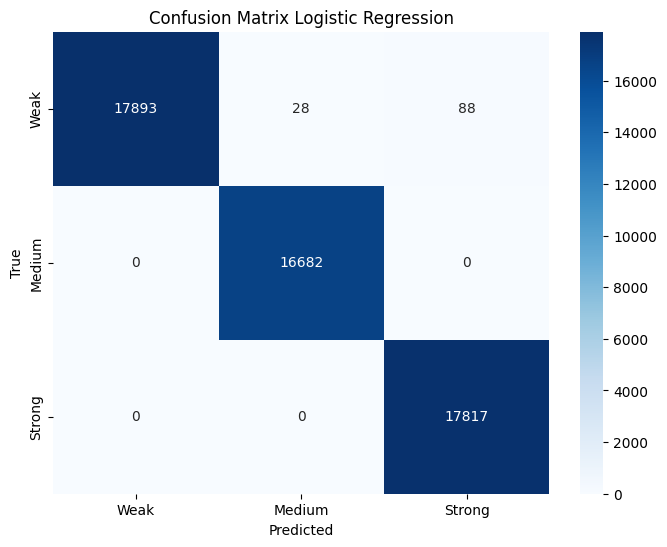

              precision    recall  f1-score   support

      Medium       1.00      0.99      1.00     18009
      Strong       1.00      1.00      1.00     16682
        Weak       1.00      1.00      1.00     17817

    accuracy                           1.00     52508
   macro avg       1.00      1.00      1.00     52508
weighted avg       1.00      1.00      1.00     52508



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung prediksi dari model
y_pred = log_reg.predict(X_test)

# Menampilkan Classification Report
report = classification_report(y_test, y_pred)

# Menghitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix dalam bentuk grafik
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Weak', 'Medium', 'Strong'], yticklabels=['Weak', 'Medium', 'Strong'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# Output Classification Report
print(report)



## K-Nearest Neighbors

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Fungsi untuk menghitung panjang password
def password_length(password):
    return len(password)

# Fungsi untuk menghitung jumlah simbol khusus
def special_symbols_count(password):
    return len(re.findall(r'[^A-Za-z0-9]', password))

# Fungsi untuk menghitung jumlah huruf besar
def uppercase_count(password):
    return len(re.findall(r'[A-Z]', password))

# Fungsi untuk menghitung jumlah angka
def digits_count(password):
    return len(re.findall(r'[0-9]', password))

# Menambahkan fitur ke dataset
data_undersampled['password_length'] = data_undersampled['password'].apply(password_length)
data_undersampled['special_symbols'] = data_undersampled['password'].apply(special_symbols_count)
data_undersampled['uppercase_count'] = data_undersampled['password'].apply(uppercase_count)
data_undersampled['digits_count'] = data_undersampled['password'].apply(digits_count)

# Menyiapkan data untuk training
X = data_undersampled[['password_length', 'special_symbols', 'uppercase_count', 'digits_count']]
y = data_undersampled['strength']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Menggunakan 5 tetangga terdekat
knn.fit(X_train, y_train)

# Menguji akurasi model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model KNN: {accuracy * 100:.2f}%')




Akurasi model KNN: 100.00%


In [ ]:
# Fungsi untuk memprediksi kekuatan password dengan model KNN
def predict_password_strength_knn(password):
    features = [
        password_length(password),
        special_symbols_count(password),
        uppercase_count(password),
        digits_count(password)
    ]
    prediction = knn.predict([features])
    return prediction[0]

# Menguji model dengan input password
test_password = input("Masukkan password untuk diuji: ")
predicted_strength = predict_password_strength_knn(test_password)
print(f'Prediksi kekuatan password "{test_password}": {predicted_strength}')

Masukkan password untuk diuji: J3ro4nsap1!
Prediksi kekuatan password "J3ro4nsap1!": Medium


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


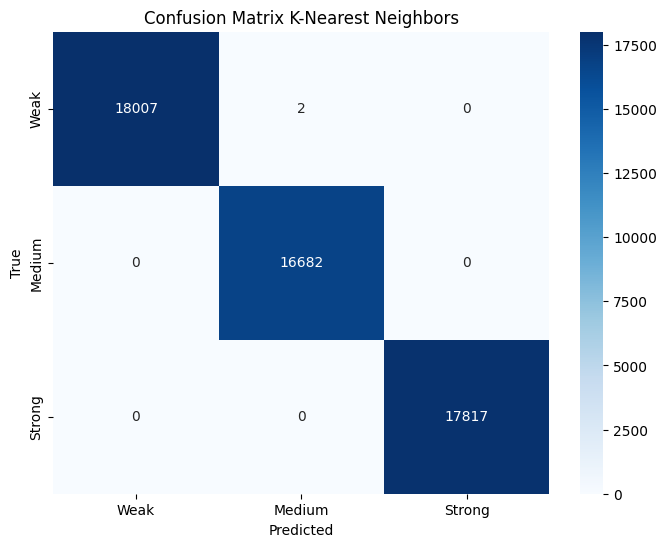

              precision    recall  f1-score   support

      Medium       1.00      1.00      1.00     18009
      Strong       1.00      1.00      1.00     16682
        Weak       1.00      1.00      1.00     17817

    accuracy                           1.00     52508
   macro avg       1.00      1.00      1.00     52508
weighted avg       1.00      1.00      1.00     52508



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Menghitung prediksi dari model KNN
y_pred = knn.predict(X_test)

# Menampilkan Classification Report
report = classification_report(y_test, y_pred)

# Menghitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix dalam bentuk grafik
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Weak', 'Medium', 'Strong'], yticklabels=['Weak', 'Medium', 'Strong'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix K-Nearest Neighbors')
plt.show()

# Output Classification Report
print(report)

## Naive Bayes

In [31]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Fungsi untuk menghitung panjang password
def password_length(password):
    return len(password)

# Fungsi untuk menghitung jumlah simbol khusus
def special_symbols_count(password):
    return len(re.findall(r'[^A-Za-z0-9]', password))

# Fungsi untuk menghitung jumlah huruf besar
def uppercase_count(password):
    return len(re.findall(r'[A-Z]', password))

# Fungsi untuk menghitung jumlah angka
def digits_count(password):
    return len(re.findall(r'[0-9]', password))

# Menambahkan fitur ke dataset
data_undersampled['password_length'] = data_undersampled['password'].apply(password_length)
data_undersampled['special_symbols'] = data_undersampled['password'].apply(special_symbols_count)
data_undersampled['uppercase_count'] = data_undersampled['password'].apply(uppercase_count)
data_undersampled['digits_count'] = data_undersampled['password'].apply(digits_count)

# Menyiapkan data untuk training
X = data_undersampled[['password_length', 'special_symbols', 'uppercase_count', 'digits_count']]
y = data_undersampled['strength']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Menguji akurasi model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy * 100:.2f}%')

# Fungsi untuk memprediksi kekuatan password
def predict_password_strength(password):
    features = [
        password_length(password),
        special_symbols_count(password),
        uppercase_count(password),
        digits_count(password)
    ]
    prediction = model.predict([features])
    return prediction[0]

# Menguji model dengan input password
test_password = input("Masukkan password untuk diuji: ")
predicted_strength = predict_password_strength(test_password)
print(f'Prediksi kekuatan password "{test_password}": {predicted_strength}')

Akurasi model: 98.10%
Masukkan password untuk diuji: 12345
Prediksi kekuatan password "12345": Medium


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Menghitung AUC untuk multi-class
auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')  # average='macro' untuk rata-rata AUC dari tiap kelas
print(f"\nAUC Score (Multi-class): {auc_score:.2f}")


AUC Score (Multi-class): 0.99


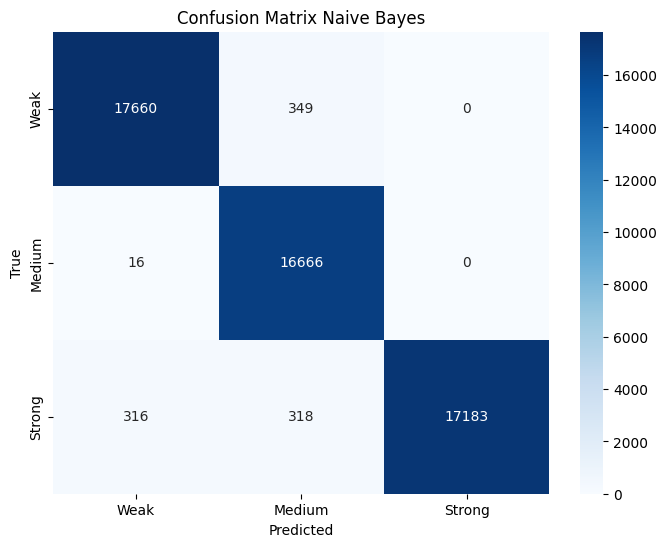

              precision    recall  f1-score   support

      Medium       0.98      0.98      0.98     18009
      Strong       0.96      1.00      0.98     16682
        Weak       1.00      0.96      0.98     17817

    accuracy                           0.98     52508
   macro avg       0.98      0.98      0.98     52508
weighted avg       0.98      0.98      0.98     52508



In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Menghitung prediksi dari model Naive Bayes
y_pred = model.predict(X_test)

# Menampilkan Classification Report
report = classification_report(y_test, y_pred)

# Menghitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix dalam bentuk grafik
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Weak', 'Medium', 'Strong'], yticklabels=['Weak', 'Medium', 'Strong'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

# Output Classification Report
print(report)


##SVM

In [33]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fungsi untuk menghitung panjang password
def password_length(password):
    return len(password)

# Fungsi untuk menghitung jumlah simbol khusus
def special_symbols_count(password):
    return len(re.findall(r'[^A-Za-z0-9]', password))

# Fungsi untuk menghitung jumlah huruf besar
def uppercase_count(password):
    return len(re.findall(r'[A-Z]', password))

# Fungsi untuk menghitung jumlah angka
def digits_count(password):
    return len(re.findall(r'[0-9]', password))

# Menambahkan fitur ke dataset
data_undersampled['password_length'] = data_undersampled['password'].apply(password_length)
data_undersampled['special_symbols'] = data_undersampled['password'].apply(special_symbols_count)
data_undersampled['uppercase_count'] = data_undersampled['password'].apply(uppercase_count)
data_undersampled['digits_count'] = data_undersampled['password'].apply(digits_count)

# Menyiapkan data untuk training
X = data_undersampled[['password_length', 'special_symbols', 'uppercase_count', 'digits_count']]
y = data_undersampled['strength']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model SVM
svm = SVC(kernel='linear', C=1)  # Menggunakan kernel linear dan parameter regularisasi C=1
svm.fit(X_train, y_train)

# Menguji akurasi model
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model SVM: {accuracy * 100:.2f}%')


# Fungsi untuk memprediksi kekuatan password dengan model SVM
def predict_password_strength_svm(password):
    features = [
        password_length(password),
        special_symbols_count(password),
        uppercase_count(password),
        digits_count(password)
    ]
    prediction = svm.predict([features])
    return prediction[0]

# Menguji model dengan input password
test_password = input("Masukkan password untuk diuji: ")
predicted_strength = predict_password_strength_svm(test_password)
print(f'Prediksi kekuatan password "{test_password}": {predicted_strength}')


Akurasi model SVM: 100.00%
Masukkan password untuk diuji: 1212
Prediksi kekuatan password "1212": Weak


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


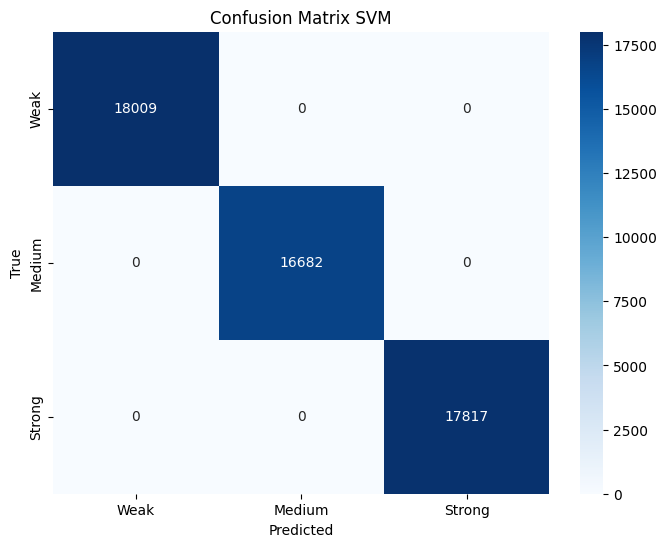

              precision    recall  f1-score   support

      Medium       1.00      1.00      1.00     18009
      Strong       1.00      1.00      1.00     16682
        Weak       1.00      1.00      1.00     17817

    accuracy                           1.00     52508
   macro avg       1.00      1.00      1.00     52508
weighted avg       1.00      1.00      1.00     52508



In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Menghitung prediksi dari model SVM
y_pred = svm.predict(X_test)

# Menampilkan Classification Report
report = classification_report(y_test, y_pred)

# Menghitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix dalam bentuk grafik
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Weak', 'Medium', 'Strong'], yticklabels=['Weak', 'Medium', 'Strong'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix SVM')
plt.show()

# Output Classification Report
print(report)


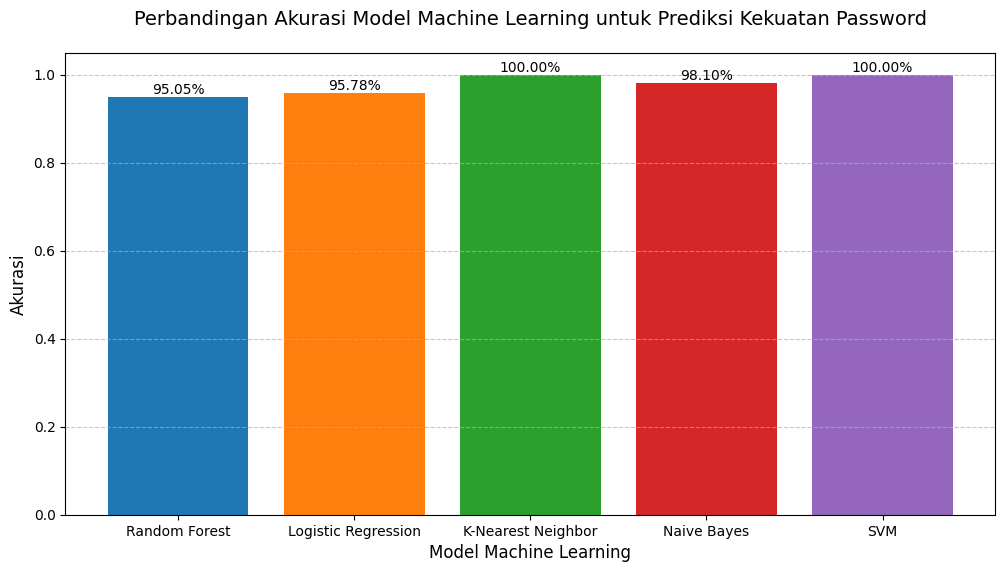

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data akurasi dari masing-masing model (gantilah dengan nilai akurasi sebenarnya dari model Anda)
models = ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbor', 'Naive Bayes', 'SVM']
accuracy = [
    0.9505,  # Ganti dengan akurasi Random Forest Anda
    0.9578,  # Ganti dengan akurasi Logistic Regression Anda
    1.00,  # Ganti dengan akurasi KNN Anda
    0.9810,  # Ganti dengan akurasi Naive Bayes Anda
    1.00   # Ganti dengan akurasi SVM Anda
]

# Warna untuk setiap bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Membuat grafik batang
plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracy, color=colors)

# Menambahkan nilai akurasi di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}', ha='center', va='bottom')

# Menambahkan judul dan label
plt.title('Perbandingan Akurasi Model Machine Learning untuk Prediksi Kekuatan Password', fontsize=14, pad=20)
plt.xlabel('Model Machine Learning', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
plt.ylim(0, 1.05)  # Batas atas y-axis sedikit lebih tinggi dari 100%

# Menambahkan grid untuk memudahkan pembacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menyimpan grafik (opsional)
plt.savefig('accuracy_comparison.png', dpi=300, bbox_inches='tight')

# Menampilkan grafik
plt.show()